## Data validation: 
I started investigating the dataset aiming to validate its data or make necessary changes if needed. 
I found that there were no NaN-values in the dataset. 

Some of the dataset's columns were numerical (int64 or float64), others object dtype. I examined the columns of object dtype more closesly to decide if they should be converted to a more approriate dtype. After examining each of their unique values, to check fo typos, variations of lower/upper case letters, unintented characters or whitespaces, we converted all these columsn to category dtype. 

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor

toyota = pd.read_csv('toyota.csv')
print("Shape of toyota dataframe: " + str(toyota.shape) + "\n")
print(toyota.head())

Shape of toyota dataframe: (6738, 9)

   model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   GT86  2016  16000       Manual    24089   Petrol  265  36.2         2.0
1   GT86  2017  15995       Manual    18615   Petrol  145  36.2         2.0
2   GT86  2015  13998       Manual    27469   Petrol  265  36.2         2.0
3   GT86  2017  18998       Manual    14736   Petrol  150  36.2         2.0
4   GT86  2017  17498       Manual    36284   Petrol  145  36.2         2.0


In [6]:
toyota.info() #showing initial dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [7]:
print(toyota.isna().sum()) #check for NaN values

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [8]:
# Checking the values in columns we assume is categorical

for col in ['model', 'transmission', 'fuelType', 'year', 'tax']:
    print(toyota[col].unique())
    print("")

[' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra'
 ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser']

['Manual' 'Automatic' 'Semi-Auto' 'Other']

['Petrol' 'Other' 'Hybrid' 'Diesel']

[2016 2017 2015 2020 2013 2019 2018 2014 2012 2005 2003 2004 2001 2008
 2007 2010 2011 2006 2009 2002 1999 2000 1998]

[265 145 150 260 200 250 140 135 235 300 125  20 160 165 205 240 330 325
   0  30 120 155 115 190  10 305 565 555 540]



In [9]:
#converting columns to category dtype:
possible_categorical_columns = ['model', 'transmission', 'fuelType']
for col in possible_categorical_columns:
    # print(toyota[col].unique())
    toyota[col] = toyota[col].astype('category')

In [10]:
toyota.describe() #mostly for checking that there are no negative values

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


## Exploratory Analysis
- two different types of graphics showing single variables only
- at least one graphic showing two or more variables 
- description of your findings

Since the ask is to predict the price, we will create some visualizations, aiming to uncover potential relationships between the target variable (price) and the other feature variables. We will start with the numerical features, then proceed to the categorical ones. 

### Selling price distribution: 
Here we see the distribution of selling price, with logaritmic scale to the right - which gives a distribution closer to the normal distribution than the one without logaritmic scale to the left. 

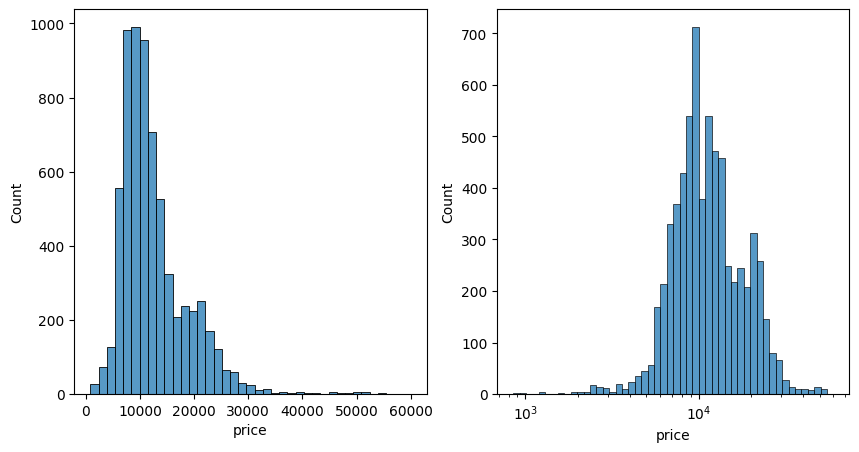

In [68]:
numerical_col = ["year", "mpg", "mileage", "tax", "engineSize"]
categorical_col = ['transmission', 'fuelType', 'model']

fig, axes = plt.subplots(1,2,figsize=(10,5))

sns.histplot(toyota, x="price", binwidth=1500, log_scale=False, ax=axes[0])
sns.histplot(toyota, x="price", bins=50, log_scale=True, ax=axes[1])
plt.show()


Next, we plot the scatterplots of all numerical variables against price. We see that engineSize seems to have a close to linear relationship with price. Year and mileage also seems to be related to price, though the plot indicates it might not be in a linear way. Tax and mpg does not seem to be related to price at all.

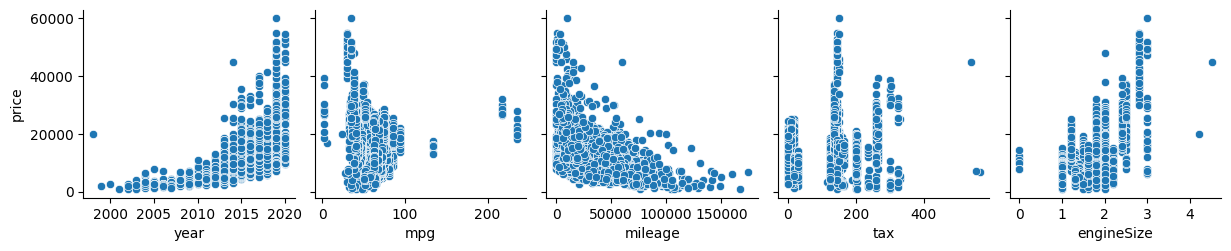

In [12]:
sns.pairplot(data=toyota, y_vars="price", x_vars=numerical_col)
plt.show()

To further analyze any potential linear relationships between the numerical features, we plot the heatmap. This confirms that engineSize seems to have the strongest linear relationship with price, with a correlation of 73%. 

A word of caution: We also see another high correlation in this heatmap, between year and mileage. None of these features are the target variable, so this relationship is not relevant to us in this report. 

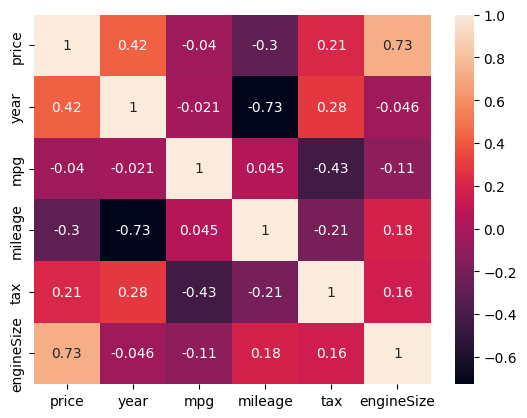

In [69]:
data_numerical = toyota[["price", "year", "mpg", "mileage", "tax", "engineSize"]]
corr_matrix = data_numerical.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

We now move on to the categorical variables and we start with a scatterplots against the target variable. As seen in the plots below, we cannot find any obvious relationship between these features and price. 

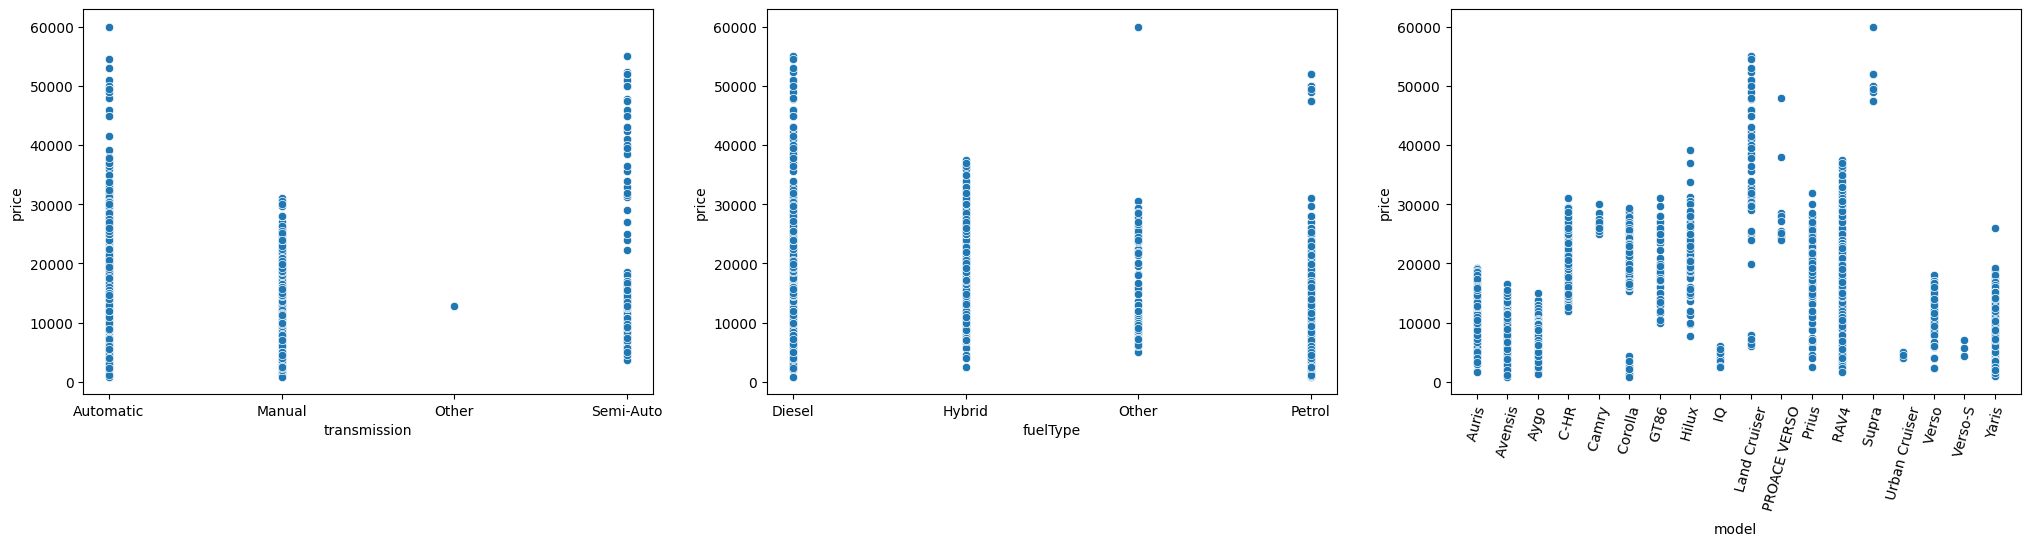

In [14]:
fig,axes = plt.subplots(1,len(categorical_col), figsize=(25,5))

for n in range(len(categorical_col)):
    sns.scatterplot(data=toyota, x=categorical_col[n], y="price", ax=axes[n])
    plt.xticks(rotation=75)
plt.show()


We also plot the corresponding box plots which seem to indicate our observation that there are no relationship between the features, other than that some if the specific models seems to be sold at much higher prices than the rest (for example Land Cruiser). 

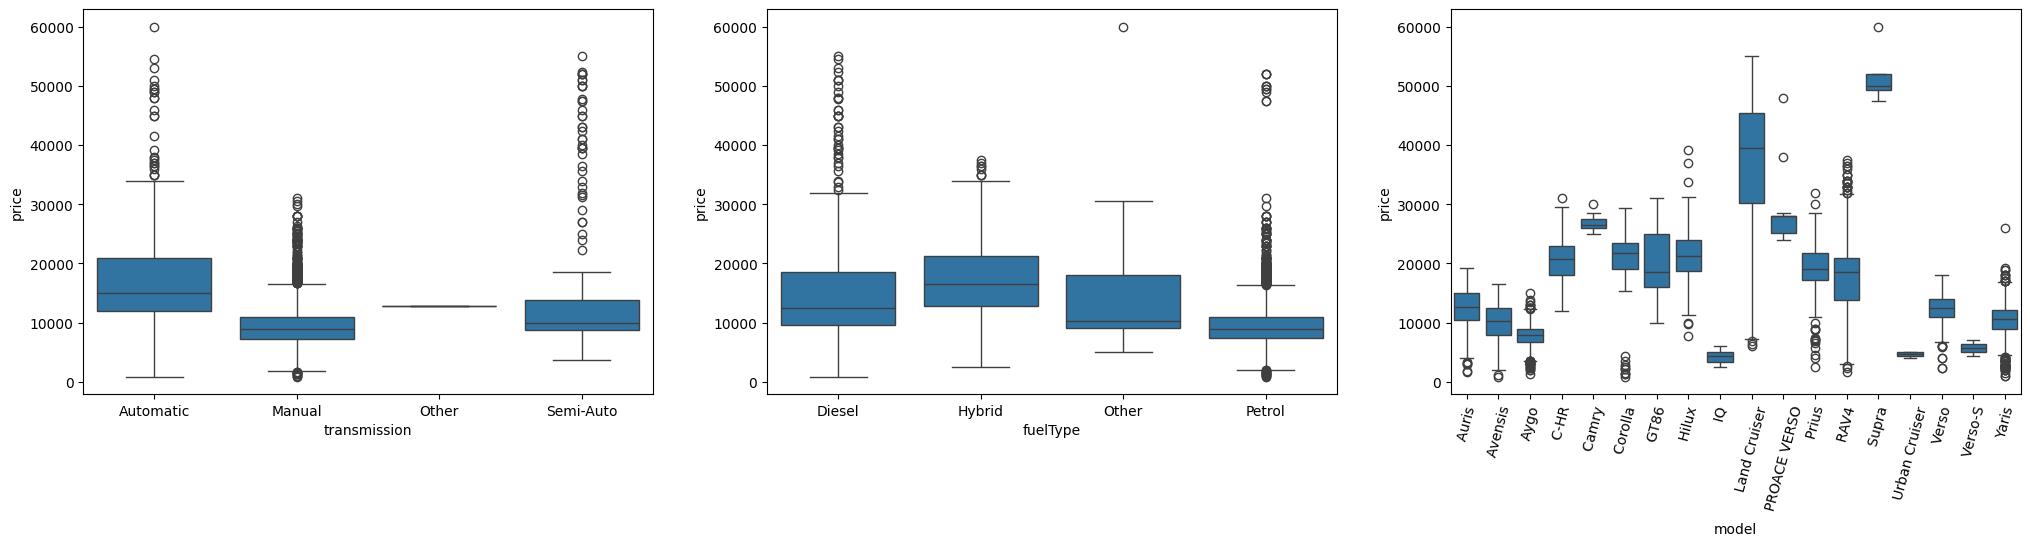

In [15]:
fig,axes = plt.subplots(1,len(categorical_col), figsize=(25,5))

for n in range(len(categorical_col)):
    sns.boxplot(data=toyota, x=categorical_col[n], y="price", ax=axes[n])
    plt.xticks(rotation=75)
plt.show()

The box plots does not show any pattern either, instead they confirm that the distribution of these categorical features are widespread and does not seem to hold any particular pattern relative to the target variable. 

We create some visualizations combining the different variables that we now believe to be related: 

In [26]:
# sns.pairplot(data=toyota, y_vars="price", x_vars=["year", "mileage", "mpg", "engineSize"], hue="fuelType")

In [25]:
# sns.pairplot(data=toyota, y_vars="price", x_vars=["year", "engineSize", "mpg"], hue="transmission")

In [24]:
# sns.pairplot(data=toyota, y_vars="price", x_vars=["mileage", "engineSize", "mpg"], hue="model")

### Summary of exploration: 
We see that there is a relationship between the target variable, price, and engine size, mileage and year. 

There is no obvious relationship between the price and transmission, fuel type, tax and model. 

# Preprocessing of data
Since the target variable is price, a numerical continous vairable, this is a regression problem. We will use Linear Regression as our baseline model, and because we suspect there may be non linear relationships between some of the features, we choose Decision Tree Regressor as the comparison model. 

We will use R squred and RMSE to measure the error for both models. 

First we need to take some steps to preprocess the data: 
- feature engineer the categorical columns so that they get a numerical value. 
- since the features will be of different scales, we will use StandardScaler to scale them

In [70]:
y = toyota[['price']]
X = toyota.drop(columns='price', axis=1)

#get numerical values for categorical columns: 
X = pd.get_dummies(X, columns=["model", "transmission", "fuelType"], drop_first=True, dtype="int64")

# scale the features:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns) 

#split dataset into train and test data set:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2)


## Baseline model: 

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import root_mean_squared_error

lr = LinearRegression() #initialize the model
lr.fit(X_train, y_train) #fit with training data
y_pred_lr = lr.predict(X_test) #predict new data 

rmse_lr = root_mean_squared_error(y_test, y_pred_lr)
accuracy_lr =lr.score(X_test, y_test) #gives R_squared

print("Linear regression RMSE: " + str(rmse_lr))
print("Linear regression R squared: " + str(accuracy_lr))

#Finding how close the predicted values are to the true value: 
i = 0
n = 0
errors = []

for price in y_test["price"]:
    difference = np.abs(price - y_pred_lr[i]) #absolute value of distance from true price
    error = float(difference/price) #distance in precentage
    errors.append(error)
    i += 1
    if error <= 0.1:
        n += 1 #count how many predicted prices are within 10% of the actual price

print("Number of predicted prices within 10 precent of actual price: " + str(n))
print("Ratio of predicted prices within 10 precent of actual price: " + str(n/i))

Linear regression RMSE: 1819.0011718490741
Linear regression R squared: 0.9193396479829682
Number of predicted prices within 10 precent of actual price: 919
Ratio of predicted prices within 10 precent of actual price: 0.6817507418397626


C:\Users\Lene-Lise\AppData\Local\Temp\ipykernel_9116\2271243286.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error = float(difference/price) #distance in precentage


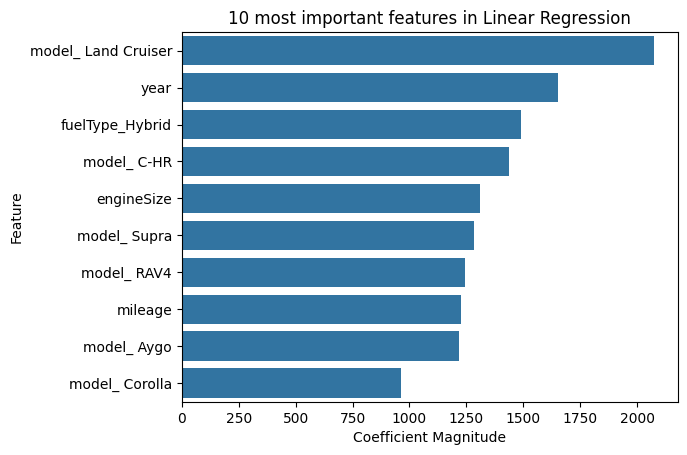

In [72]:
#Finding the most important features in this model: 
lr_feature_importance = np.abs(lr.coef_).flatten()
lr_df_feature_importance = pd.DataFrame({"Feature": X_train.columns, "Coefficients": lr_feature_importance})
lr_df_feature_importance = lr_df_feature_importance.sort_values(by="Coefficients", ascending=False)

# Plotting 10 most important features:
lr_plot = sns.barplot(
    data=lr_df_feature_importance[:10][:],
    x = "Coefficients",
    y="Feature"
)
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.title("10 most important features in Linear Regression")
plt.show()

In [57]:
# scores = {}

# for alpha in [0.1, 1, 10, 100, 1000]:
#     ridge = Ridge(alpha = alpha)
#     ridge.fit(X_train, y_train)
#     y_pred_ridge = ridge.predict(X_test)

#     #check accuracy for each alpha:
#     # scores.append(ridge.score(X_test, y_test)) # R squared

#     scores[str(alpha)] = ridge.score(X_test, y_test)

# print(scores) #R squared for each alpha

# ridge_important_features = np.abs(ridge.coef_) # one weight for each column (including the "dummy columns")

# # Create a DataFrame to pair features with importance
# ridge_df_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': ridge_important_features})
# ridge_df_feature_importance = ridge_df_feature_importance.sort_values(by="Coefficient", ascending=False).reset_index(drop=True)

# lr_plot = sns.barplot(
#     data=ridge_df_feature_importance[:10][:],
#     x = "Coefficient",
#     y="Feature"
# )
# #
# plt.xlabel("Coefficient Magnitude")
# plt.ylabel("Feature")
# plt.title("10 most important features in Ridge Regression")
# plt.show()

## Comparison model: 

Decision Tree RMSE: 1494.1192642557203
Decision Tree R squared: 0.9455792295461076
Number of predicted prices within 10 precent of actual price: 1016
Ratio of predicted prices within 10 precent of actual price: 0.7537091988130564


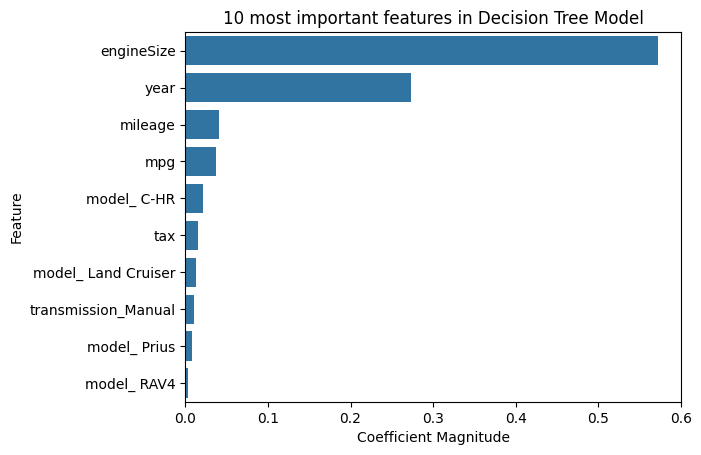

In [73]:
dt = DecisionTreeRegressor(
    max_depth=12 # 12 i randomly set, can use hyper parameter tuning to find a more optimal values
    )

dt.fit(X_train, y_train)

# y_predict_train = dt.predict(X_train)
y_pred_dt = dt.predict(X_test)

# print(np.sqrt(MSE(y_train, y_predict_train)))
# print(np.sqrt(MSE(y_test, y_predict_test)))

# print(dt.score(X_test, y_test)) #R squared

rmse_dt = root_mean_squared_error(y_test, y_pred_dt)
# accuracy_dt = dt.score(y_test, y_pred_dt)
accuracy_dt =dt.score(X_test, y_test) #gives R_squared

print("Decision Tree RMSE: " + str(rmse_dt))
print("Decision Tree R squared: " + str(accuracy_dt))

i = 0
n = 0
errors = []
for price in y_test["price"]:
    # print(price)
    difference = np.abs(price - y_pred_dt[i])
    error = float(difference/price)
    errors.append(error)
    i += 1
    if error <= 0.1:
        n += 1

print("Number of predicted prices within 10 precent of actual price: " + str(n))
print("Ratio of predicted prices within 10 precent of actual price: " + str(n/i))


dt_important_features = np.abs(dt.feature_importances_) # one weight for each column (including the "dummy columns")

# Create a DataFrame to pair features with importance
dt_df_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': dt_important_features})
dt_df_feature_importance = dt_df_feature_importance.sort_values(by="Coefficient", ascending=False).reset_index(drop=True)

# print(dt_df_feature_importance.head())

dt_plot = sns.barplot(
    data=dt_df_feature_importance[:10][:],
    x = "Coefficient",
    y="Feature"
)

plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.title("10 most important features in Decision Tree Model")
plt.show()


In [58]:
# rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=1)
# rf.fit(X_train, y_train.values.ravel())
# print(rf.score(X_test, y_test)) 

# rf_important_features = np.abs(rf.feature_importances_) # one weight for each column (including the "dummy columns")

# # Create a DataFrame to pair features with importance
# rf_df_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': ridge_important_features})
# rf_df_feature_importance = rf_df_feature_importance.sort_values(by="Coefficient", ascending=False).reset_index(drop=True)

# print(rf_df_feature_importance.head())

# dt_plot = sns.barplot(
#     data=rf_df_feature_importance[:10][:],
#     x = "Coefficient",
#     y="Feature"
# )

# plt.xlabel("Coefficient Magnitude")
# plt.ylabel("Feature")
# plt.title("10 most important features in Random Forest Regressor Model")
# plt.show()

## Summary of finding from baseline and comparison model: 
The linear regression model was able to predict 68.9% of the prices within 10% of the actual price. In contrast, the Random Tree model got 73.6% of its prediction within 10%. We also saw that the Tree model was able to get higher accuract in terms of R squared, and less error measured in RMSE. 

In all, the Decistion tree model performed better than the linear regression model. One reason for this could be that it better encapsules the non linear relationships that may exist in the dataset. 

# Definition of a metric for the business to monitor: 
- how can the business monitor what they want to achieve
- estimate initial values for the metric based on current data
- final summary including recommendations the business should undertake

My recommendation would be: 
- replace the current model with a tree model to ensure non linear relationships are taken into account. 
- consider using a random forest model for even better results
- let the model work on data over time, and use collected data to fine tune hyper parameters (for example max_depth)
- you may also consider using GridSearch for finetuning hyperparameters
- Relevant KPI for this case may be to get the number of predicted prices within 10% of the actual selling price up to 77%. 
- experiment using other machine learning models that are optimized for non linear relationships. One example can be a random forest model, that builds on the same concepts that decistion trees, but via more iterations may give better results. 
